# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Mencari Matriks Sensitivitas

In [2]:
import pandas as pd
data = pd.read_excel('Data Akhir.xlsx')
data

,order_purchase_timestamp,customer_id_seller1,product_category_name_english_seller1,order_id_seller1,order_item_id_seller1,product_id_seller1,seller_id_seller1,price_seller1,quantity_per_order_seller1,customer_id_seller2,...,price_seller2,quantity_per_order_seller2,customer_id,product_category_name_english,order_id,order_item_id,product_id,seller_id,price,quantity_per_order
0,2017-06-11 13:04:43,0,watches_gifts,0,0,0,0,125.0,0,142a4e4e5238d5ff64a7cd659ec0f95e,...,163.0,1,0,watches_gifts,0,0,0,0,119,0
1,2017-06-12 09:15:35,0,watches_gifts,0,0,0,0,125.0,0,72cb30eee8406d375e223bf6532f6c4a,...,163.0,1,0,watches_gifts,0,0,0,0,119,0
2,2017-06-22 11:54:35,0,watches_gifts,0,0,0,0,125.0,0,24e69f16d58f72c3cf950598399a16a5,...,163.0,1,0,watches_gifts,0,0,0,0,119,0
3,2017-06-27 11:18:43,0,watches_gifts,0,0,0,0,125.0,0,9438a63c1d4be3c9a73c551d59804886,...,163.0,1,0,watches_gifts,0,0,0,0,119,0
4,2017-07-14 09:22:32,0,watches_gifts,0,0,0,0,125.0,0,670a432cf10d38da64efeaf03fcf6385,...,163.0,1,0,watches_gifts,0,0,0,0,119,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,2018-07-05 18:57:13,0,watches_gifts,0,0,0,0,125.0,0,0,...,116.9,0,5b44eea88fb939f313c15cb15583094c,watches_gifts,c05a5defefe139269bfc13a22fbe8543,1,53b36df67ebb7c41585e8d54d6772e08,58f1a6197ed863543e0136bdedb3fce2,119,1
319,2018-07-10 16:53:01,0,watches_gifts,0,0,0,0,125.0,0,0,...,116.9,0,c1376f3aeb94f912ba838eea99b8667a,watches_gifts,88378ffe8de3a4e0d7ef03e71010d618,1,53b36df67ebb7c41585e8d54d6772e08,58f1a6197ed863543e0136bdedb3fce2,119,1
320,2018-07-17 22:44:42,0,watches_gifts,0,0,0,0,125.0,0,0,...,116.9,0,643c75fed93c5f43541eaf9c6c8b4828,watches_gifts,066a60f7b0700a942ba22b627ebff13b,1,53b36df67ebb7c41585e8d54d6772e08,58f1a6197ed863543e0136bdedb3fce2,119,1
321,2018-07-28 10:11:59,864c3a5085d7d4e6c2153baaf6274cc1,watches_gifts,b89d417b1ba9f8e416b9e333ffa01a93,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,112.0,1,0,...,116.9,0,0,watches_gifts,0,0,0,0,119,0


In [3]:
# Mendefinisikan variabel bebas (X) dan variabel terikat (y)
X = data[['price_seller1', 'price_seller2', 'price']]
y1 = data['quantity_per_order_seller1']
y2 = data['quantity_per_order_seller2']
y3 = data['quantity_per_order']
X = sm.add_constant(X)

#Fitting model regresi
model1 = sm.OLS(y1, X).fit()
model2 = sm.OLS(y2, X).fit()
model3 = sm.OLS(y3, X).fit()

print("Regression coefficients for banyak_order1:")
print(model1.params)
print("\nRegression coefficients for banyak_order2:")
print(model2.params)
print("\nRegression coefficients for banyak_order3:")
print(model3.params)

print("\nSummary for banyak_order1:")
print(model1.summary())
print("\nSummary for banyak_order2:")
print(model2.summary())
print("\nSummary for banyak_order3:")
print(model3.summary())

Regression coefficients for banyak_order1:
price_seller1   -0.043882
price_seller2   -0.001518
price            0.049741
dtype: float64

Regression coefficients for banyak_order2:
price_seller1    0.023375
price_seller2    0.015290
price           -0.034387
dtype: float64

Regression coefficients for banyak_order3:
price_seller1    0.001746
price_seller2   -0.000771
price           -0.000792
dtype: float64

Summary for banyak_order1:
                                OLS Regression Results                                
Dep. Variable:     quantity_per_order_seller1   R-squared:                       0.397
Model:                                    OLS   Adj. R-squared:                  0.393
Method:                         Least Squares   F-statistic:                     105.4
Date:                        Thu, 20 Jun 2024   Prob (F-statistic):           7.04e-36
Time:                                03:23:52   Log-Likelihood:                -304.18
No. Observations:                       

In [4]:
# Menghitung rata-rata harga barang per penjual dan banyak barang terjual per penjual
avg_price_seller1 = data['price_seller1'].mean()
avg_price_seller2 = data['price_seller2'].mean()
avg_price_seller3 = data['price'].mean()
avg_order1 = data['quantity_per_order_seller1'].mean()
avg_order2 = data['quantity_per_order_seller2'].mean()
avg_order3 = data['quantity_per_order'].mean()

coeff1 = model1.params[['price_seller1', 'price_seller2', 'price']]
coeff2 = model2.params[['price_seller1', 'price_seller2', 'price']]
coeff3 = model3.params[['price_seller1', 'price_seller2', 'price']]

# Menghitung sensitivitas
elasticity1 = coeff1 * [avg_price_seller1, avg_price_seller2, avg_price_seller3] / avg_order1
elasticity2 = coeff2 * [avg_price_seller1, avg_price_seller2, avg_price_seller3] / avg_order2
elasticity3 = coeff3 * [avg_price_seller1, avg_price_seller2, avg_price_seller3] / avg_order3

print("Price Elasticities for banyak_order1:")
print(elasticity1)
print("\nPrice Elasticities for banyak_order2:")
print(elasticity2)
print("\nPrice Elasticities for banyak_order3:")
print(elasticity3)

Price Elasticities for banyak_order1:
price_seller1   -6.293432
price_seller2   -0.233750
price            7.527181
dtype: float64

Price Elasticities for banyak_order2:
price_seller1     6.652418
price_seller2     4.673503
price           -10.325921
dtype: float64

Price Elasticities for banyak_order3:
price_seller1    21.200171
price_seller2   -10.049588
price           -10.150583
dtype: float64


# Simulasi Dynamic Pricing

In [11]:
#np.random.seed(42)
np.random.seed(201)

# Mendefinisikan Parameter
A_initial = 385  # Total Produk Terjual
a = [[6.293432, -0.233750, 7.527181],
    [6.652418, -4.673503, -10.325921],
     [21.200171, -10.049588, 10.150583]]

initial_prices = np.array([125, 163, 119]) # Harga Awal
max_steps = 20 # Banyak Step

# Inisiasi Harga dan variabel lain
p = initial_prices.copy()
num_sellers = len(a) # Banyak Seller
columns = ['Step'] + [f'Price_Seller_{i+1}' for i in range(num_sellers)] + \
          [f'Demand_Seller_{i+1}' for i in range(num_sellers)] + \
          [f'Revenue_Seller_{i+1}' for i in range(num_sellers)]
simulation_data = []
A = A_initial
total_revenues = np.zeros(num_sellers)
cumulative_revenues = np.zeros(num_sellers)
equilibrium_reached = False
equilibrium_step = -1

for step in range(max_steps):
    new_p = p.copy() 
    demands = []
    revenues = []

    # Menghitung Permintaan (Demand)
    for i in range(num_sellers):
        other_prices_sum = sum(a[i][j] * p[j] for j in range(num_sellers) if j != i) 
        if p[i] < min(p[j] for j in range(num_sellers) if j != i):
            q_i = A - a[i][i] * p[i] + other_prices_sum
        elif p[i] > min(p[j] for j in range(num_sellers) if j != i):
            q_i = 0
        else:
            q_i = (A - a[i][i] * p[i] + other_prices_sum) / num_sellers
        
        demands.append(q_i)
        
        # Menghitung revenue
        if np.all(p == p[0]):  # syarat kesetimbangan Nash
            revenues.append(q_i * p[i])
        else:
            if p[i] == min(p): # ketika price masih belum setimbang
                revenues.append(p[i])
            else:
                revenues.append(0)

    total_revenues += revenues
    simulation_data.append([step] + list(new_p) + demands + revenues)

    # Pemilihan Harga
    for i in range(num_sellers):
        if demands[i] > A:  # Jika Demand lebih besar dari Supply
            if p[i] == min(p):  # Jika p_i < min(p_j)
                max_increment = max(p) - p[i] + 1 # Range perbedaan harga
                if max_increment > 0:
                    increment = np.random.randint(1, max_increment + 1)
                    new_p[i] += increment
        elif demands[i] == 0:  # Jika tidak ada permintaan
            max_decrement = p[i] - min(p) + 1
            if max_decrement > 0:
                decrement = np.random.randint(1, max_decrement + 1)
                new_p[i] -= decrement

    # Membulatkan harga
    new_p = np.round(new_p, 2)

    # Periksa kesetimbangan
    if np.all(new_p == new_p[0]):
        if equilibrium_reached:
            break
        equilibrium_reached = True
        equilibrium_step = step

    p = new_p.copy()
    A -= 1  # Decrease the stock by 1

df_simulation = pd.DataFrame(simulation_data, columns=columns)

print("Final Prices:", p)
print("Total Revenues:", total_revenues)
# Display the simulation DataFrame
print(df_simulation)

Final Prices: [118 118 118]
Total Revenues: [19909.66202533 19788.66666667 19907.66666667]
    Step  Price_Seller_1  Price_Seller_2  Price_Seller_3  Demand_Seller_1  \
0      0             125             163             119         0.000000   
1      1             124             121             119         0.000000   
2      2             123             119             124         0.000000   
3      3             121             123             123       517.586741   
4      4             124             122             120         0.000000   
5      5             120             121             123       522.347673   
6      6             122             120             122         0.000000   
7      7             119             122             121       511.352993   
8      8             121             120             119         0.000000   
9      9             119             119             121       170.018081   
10    10             119             119             118      

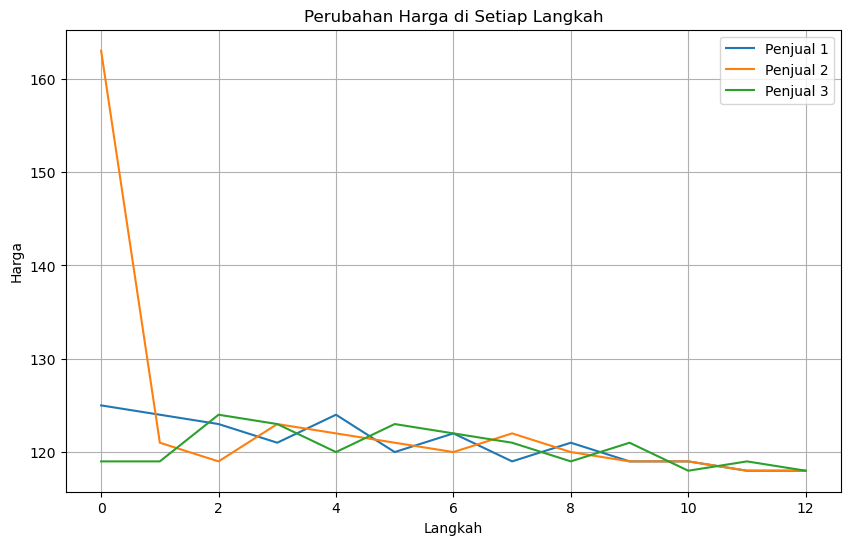

In [12]:
plt.figure(figsize=(10, 6))
for i in range(num_sellers):
    plt.plot(df_simulation['Step'], df_simulation[f'Price_Seller_{i+1}'], label=f'Penjual {i+1}')

plt.xlabel('Langkah')
plt.ylabel('Harga')
plt.title('Perubahan Harga di Setiap Langkah')
plt.legend()
plt.grid(True)
plt.savefig('Perubahan Harga di Setiap Langkah.png')
plt.show()


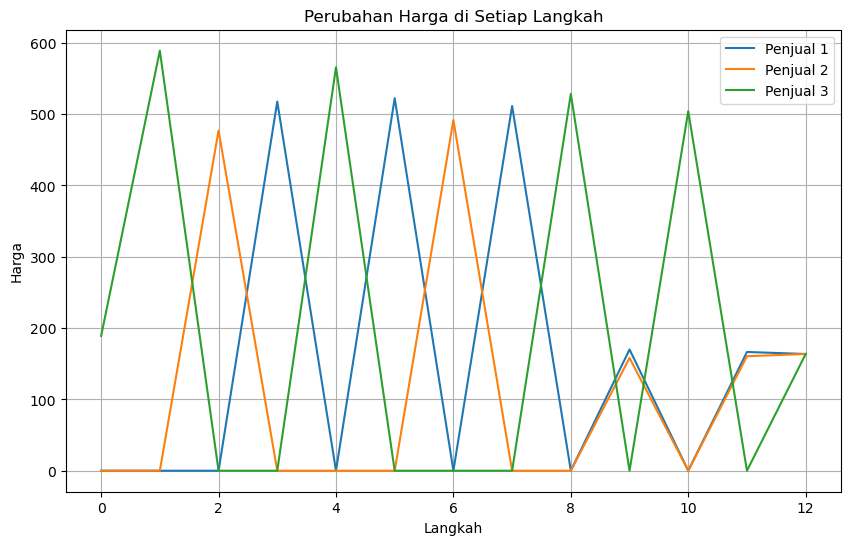

In [13]:
plt.figure(figsize=(10, 6))
for i in range(num_sellers):
    plt.plot(df_simulation['Step'], df_simulation[f'Demand_Seller_{i+1}'], label=f'Penjual {i+1}')

plt.xlabel('Langkah')
plt.ylabel('Harga')
plt.title('Perubahan Harga di Setiap Langkah')
plt.legend()
plt.grid(True)
plt.savefig('Perubahan Harga di Setiap Langkah.png')
plt.show()


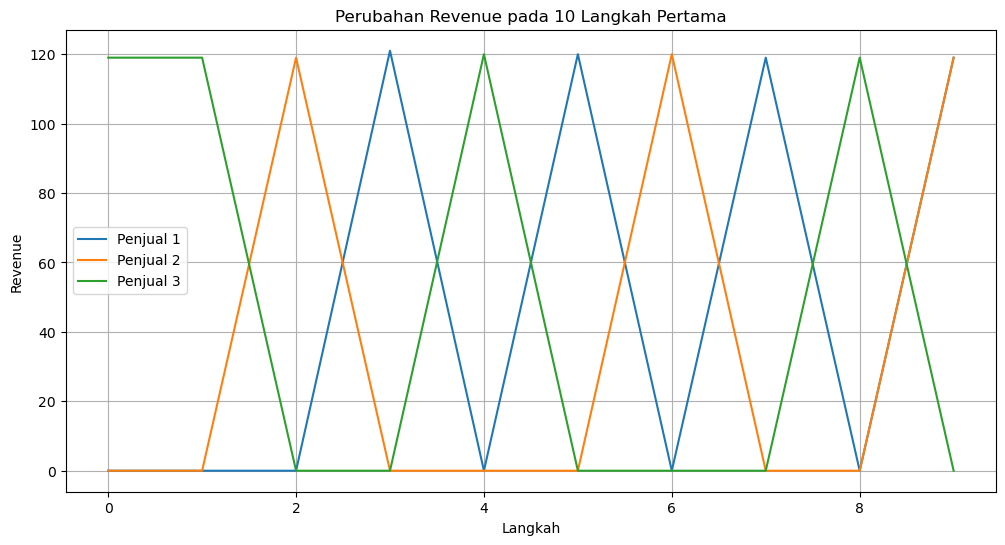

In [14]:
plt.figure(figsize=(12, 6))
for i in range(num_sellers):
    plt.plot(df_simulation['Step'][:10], df_simulation[f'Revenue_Seller_{i+1}'][:10], label=f'Penjual {i+1}')

plt.xlabel('Langkah')
plt.ylabel('Revenue')
plt.title('Perubahan Revenue pada 10 Langkah Pertama')
plt.legend()
plt.grid(True)

# Save the plot before displaying
plt.savefig('Perubahan Revenue pada 10 Langkah Pertama.png')
plt.show()

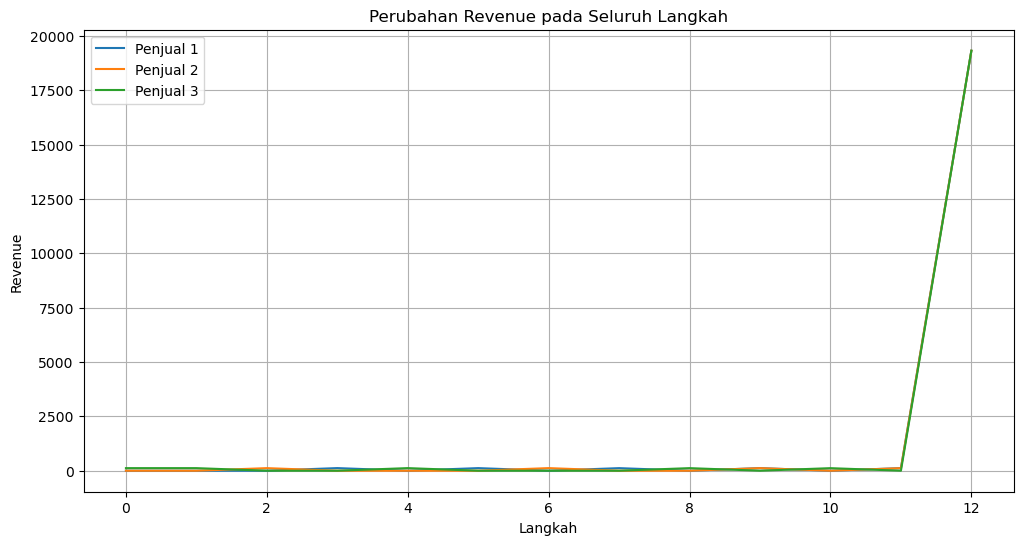

In [15]:
# Plot the revenue changes over the steps
plt.figure(figsize=(12, 6))
for i in range(num_sellers):
    plt.plot(df_simulation['Step'], df_simulation[f'Revenue_Seller_{i+1}'], label=f'Penjual {i+1}')

plt.xlabel('Langkah')
plt.ylabel('Revenue')
plt.title('Perubahan Revenue pada Seluruh Langkah')
plt.legend()
plt.grid(True)
plt.savefig('Perubahan Revenue pada Seluruh Langkah.png')
plt.show()
